# Project: Iris Dataset Analysis

****

This notebook provides a step by step analysis of the renowned Iris dataset, offering a comprehensive guide for analyzing its various dimensions with Python. In addition, the content provided in this notebook aims to clearly explain each of the scripts created in Python for this analysis as well as the modules and functions used.     
It takes users through a structured journey, starting with dataset loading and basic exploration, progressing to understanding variable types and modeling techniques. Subsequent sections delve into categorical data analysis and exploration of numerical variables via summary statistics and histograms. Then, further sections explore with scatterplots and heat map the relationship between the variables and ends with a program that prints the results of a correlation analysis carried out between each two variables of the dataset.       
This systematic approach empowers users to grasp the dataset's intricacies and relationships, thereby aiding informed analysis and decision-making in relevant research or applications.

  
<u>**Packages and Modules:**</u>  

Each program created for this project has their own list of imported libraries, packages, modules and functions [[16]](#16). Below you can see ths list imported from external libraries or custom Python scripts created specifically for this project [[17]](#17). Their usage in this project is also informed.

External:

- "os" [[18]](#18):
    - check if a file exists in load_iris.py.
    - create directories to store the generated histograms in histogram.py.
- "pandas" [[19]](#19):
    - handle the Iris dataset in DataFrame format in load_iris.py.
    - for data summary, and handling and manipulating the data structure in summary.py. 
- "io" [[20]](#20):
    - use to create a string buffer for df.info() in summary.py.
- "matplotlib.pyplot" [[21]](#21):
    - plot histograms and add visual elements to the plots in histogram.py.
    - plot the figure with the scatterplots in scatterplot.py.
    - plot the heatmap and set figure size and plot title, add legends, and display the heatmap plot created with Seaborn in heatmap.py.
- "numpy" [[22]](#22):
    - use for histogram calculations and array manipulations in histogram.py.
- from "scipy.stats" import "norm", "skew" [[23]](#23) [[24]](#24) [[25]](#25):
    - fit normal distributions and calculate skewness in the histograms in histogram.py.
- "seaborn" [[26]](#26):
    - for advanced data visualization, creating the heatmap in heatmap.py.
    - create a scatterplot matrix using the "pairplot" function in scatterplot.py.
- from "tabulate" import "tabulate" [[27]](#27):
    - for table formatting in summary.py.

Custom:

- from "load_iris" import "load_dataset":
    - use to load the Iris dataset into summary.py, histogram.py, heatmap.py, correlation.py, scatterplot.py.
- from "correlation" import "create_correlation:
    - write the correlation summary to summary.txt through summary.py.
- from "summary" import "create_summary", from "histogram" import "create_histogram", from "scatterplot" import "create_scatterplot", from "heatmap" import "create_heatmap":
  - all the functions of these programs are imported in analysis.py to be executed from a centralized location.

In [1]:
# Import necessary libraries, packages and modules:

# External 
import os
import pandas as pd 
import io  
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, skew
import seaborn as sns
from tabulate import tabulate  


# Custom
from load_iris import load_dataset  
from correlation import create_correlation  
from summary import create_summary
from histogram import create_histogram
from scatterplot import create_scatterplot
from heatmap import create_heatmap

## 1 - Loading the Iris dataset

The program load_iris.py has been created to facilitate the loading of the Iris dataset into the programs summary.py, histogram.py, scatterplot.py, heatmap.py, and correlation.py. The function load_dataset is defined in load_iris.py and used in each of the mentioned programs to call in and run the script below in order to load the Iris dataset there. The script is broken down as follow:   

### 1.1 Script

<u>**Segments and functions:**</u>   

The function load_dataset(file_name) takes a filename as input and returns a DataFrame containing the Iris dataset [[28]](#28). Within this function other functions are used:      
- It first checks if the specified file exists using os.path.exists(file_name) [[29]](#29). If the file does not exist, it prints a message indicating the absence of the file and exits the program with quit(1) [[30]](#30) [[31]](#31).
- If the file exists, it loads the dataset into a DataFrame using pd.read_csv(file_name, header=None), assuming the dataset is in CSV format without a header row [[32]](#32).
- Then, it defines column titles for the DataFrame using a predefined list column_title [[33]](#33).
- Finally, it sets the column titles as headers for the DataFrame and returns the resulting DataFrame [[33]](#33). 

<u>**Main Execution:**</u>     
 
- if \_\_name\_\_ == "\_\_main\_\_": This condition checks if the script is being run directly (not imported as a module) [[34]](#34).
- load_dataset('iris.data'): Calls the load_dataset function with the filename 'iris.data'. If the script is executed directly, this line will execute the function and load the Iris dataset. If the file does not exist, it will print the warning message.

In [2]:
def load_dataset(file_name):
    """
    Loads the Iris dataset from the specified file.

    Parameter:
        file_name: Name of the file containing the Iris DataSet.
    """
    # Check if file exists
    if not os.path.exists(file_name):
        # if file does not exist, then output a message
        print(f'{file_name} does not exist. The "iris.data" file needs to be saved in the repository pands-project')
        quit(1)
    
    # Load dataset 
    df = pd.read_csv(file_name, header=None)


    # Adding Column titles to the iris.data:

    # Defining the column titles
    column_title = ["Sepal Length (cm)", "Sepal Width (cm)", "Petal Length (cm)", "Petal Width (cm)", "Species"]

    # Setting column titles as headers to the dataframe
    df.columns = column_title

    # Return the loaded dataset
    return df
    
# If this script is executed as the main program
if __name__ == "__main__":
    # Load the 'iris.data' dataset 
    load_dataset('iris.data')

## 2. Summary:

The program summary.py has been created with the goal of printing out a summary of the Iris dataset to a single text file called summary.txt. This program is loaded as a module into the main program analysis.py.


### 2.1 Script

<u>**Segments and functions:**</u>        

The function "create_summary(file_name)" is defined in summary.py to generate a summary of each variable in the dataset and save it all to a text file. These are the other functions used within create_summary:
- "load_dataset(file_name)" is a function defined in the module load_iris and is used to load the Iris DataSet from a file.
- "io.StringIO" creates a string buffer called variable_buffer [[35]](#35). It's used to capture the output generated by the function df.info, which provides information about the variables (columns), storing it for further processing or analysis.
- Categorical Data snippet in Python aims to summarize categorical data in the DataFrame. It starts with an empty dictionary called categorical_summary [[36]](#36). Then, a "for" loop is presented where for each column in the DataFrame that contains categorical data identified using "select_dtypes(include=['object'])", it counts the occurrences of each category "counts = df[column].value_counts()", calculates the number of unique categories "unique_categories = len(counts)", and stores this information in the categorical_summary dictionary under the corresponding column name [[37]](#37) [[38]](#38) [[39]](#39).
- Continuous Data segment summarises continuous data in df, which is calculated using the function "describe". This function computes various descriptive statistics for each column containing numerical (continuous) data, such as count, mean, standard deviation, minimum, maximum, and quartile values, providing a comprehensive overview of the continuous variables in the dataset [[40]](#40).
- The segment 'Output to a single data file' writes a detailed summary of the Iris dataset, including an introduction, data type summary, categorical and continuous variable summaries, and correlation analysis, into a text file named "summary.txt". This is how it is done:
    - "with open('summary.txt', 'wt') as sf" opens a file named "summary.txt" in write mode ('wt') and assigns it to the alias variable "sf" [[41]](#41). The with statement ensures that the file is properly closed after its suite finishes, even if an exception is raised [[42]](#42).
    - "sf.write()" handles the writing of various summaries to the file "summary.txt" [[43]](#43). It sequentially writes the title, an introduction, an overview of the dataset's head and tail, a summary of data types, summaries for categorical and continuous variables, and finally, a summary of correlation analysis.
    - The "tabulate" function formats the DataFrame outputs, using the following parameters [[44]](#44):
        - object: functions head or tail from pandas [[45]](#45).
        - headers:  keys of the DataFrame, or column indices.
        - tablefmt: format of the table as "grid".
    - "variable_buffer.getvalue()" retrieves the captured output of df.info() that was placed into the buffer "variable_buffer" [[20]](#20) [[46]](#46).
    - segment "summaries for categorical variables":
        - A counter is initialized to keep track of the variable numbering with "counter = 1" [[47]](#47).
        - The loop iterates through each categorical variable and its corresponding summary. "categorical_summary" is the dictionary previously defined and the function "items" is used to retrieve the key-value pairs from the dictionary [[48]](#48).
        - The counter and variable in the f-string is used to write to summary.txt the appropriate subsection and its associated name regarding each time a categorical variable is found [[47]](#47).
        - "summary['count'].to_string(header=False)" converts the 'count' series to a string with "to_string" and writes it to the file, excluding the header with "header=False" [[49]](#49) [[50]](#50).
        - "summary['unique_categories']" writes the "unique_category" count from the "summary" variable found in categorical_summary.items().
        - "counter += 1" increments the counter for the next variable [[47]](#47).
    - segment "summaries for continuous variables", the additional functions used here that is not used in "summaries for categorical variables" are:
        - "for statistic in continuous_summary.index" iterates over the ".index" of the "continuous_summary", which contains the names of the statistical measures (e.g., mean, median, std) [[51]](#51).
        - The "capitalize()" method is used to capitalize the first letter of the statistic name [[52]](#52). The "loc" accessor of the DataFrame retrieves the value at the specified row and column [[53]](#53).
    - "create_correlation(file_name) computes correlation analysis for the dataset.

<u>**Main Execution:**</u>
- The script checks if it is being run as the main program (if __name__ == "__main__":) and generates a summary for the 'iris.data' dataset [[34]](#34).
    
### 2.2 File summary.txt

The summary.txt outputs the following info from the Iris dataset:
- 1. Introduction: Looking into the data - 5 first and last rows of the Iris dataset.
- 2. Summary of the Data Types in Python - Displays the different Python data types used in Iris dataset, number of non-null counts and classify Python data types to categorical or continuous.
- 3. Summary for Categorical Variables - for each categorical variable in the Iris dataset it prints out the count per value within the category.
- 4. Summary for Continuous Variables - for each continuous variable within the dataset it returns the descriptive statistics, such as count of values, mean, standard deviation, minimum value, maximum value, and 25, 50 and 75 percentiles.
- 5. Summary of Correlation Analysis - reference section 6 of this iris_project.ipynb.

The summary of the Iris dataset provides an in-depth analysis of its contents. It reveals a variety of data types, including measurements like sepal and petal sizes, as well as categorical data indicating the species of the iris flower. Through descriptive statistics, such as means, standard deviations, and quartiles, it illustrates the distribution of the continuous variables. Additionally, it highlights three distinct categories within the 'Species' variable: Iris-setosa, Iris-versicolor, and Iris-virginica, each with an equal representation of 50 occurrences. Furthermore, the analysis of the correlation summary is completed in section 6.2. Overall, this understanding facilitates informed decision-making and further analysis into the dataset. Creating visual representations, such as histograms, can aid to better understand the relationships between variables and the distribution of data.

In [3]:
def create_summary(file_name):
    """
    Generates a summary of each variable in the dataset, provides an overview of the first 5 rows
    and last 5 rows of the dataset, and saves it all to a text file.

    Parameter:
        Name of the file containing the Iris DataSet.
    """
    # Load the dataset
    df = load_dataset(file_name)

    # Summary of the variables

    # Types of Variables of the Dataset
    # Create a string buffer to capture the output
    variable_buffer = io.StringIO()
    # Capture the output of df.info()
    df.info(buf=variable_buffer)

    # Categorical Data
    categorical_summary = {}
    # Count: loop through each categorical variables
    for column in df.select_dtypes(include=['object']):
        # Count occurrences of each category
        counts = df[column].value_counts()
        # Get the number of unique categories
        unique_categories = len(counts)
        # Add summary to dictionary
        categorical_summary[column] = {
            'count': counts,
            'unique_categories': unique_categories
        }

    # Continuous Data
    # Calculate continuous summary
    continuous_summary = df.describe()

    # Output to a single text file
    with open('summary.txt', 'wt') as sf:
        # Write the title of the summary.txt file
        sf.write("This is a summary of the Iris Dataset variables:\n\n\n")

        # Write an overview of the first 5 rows of the dataset
        sf.write("1. Introduction: Looking into the data\n\n")
        sf.write("1.1 Head of the Dataset:\n")
        sf.write("This is a quick overview of the first 5 rows of the dataset.\n")
        # Write the formatted DataFrame head to the summary file using tabulate
        sf.write(tabulate(df.head(), headers='keys', tablefmt='grid') + "\n\n")

        # Write an overview of the last 5 rows of the dataset
        sf.write("1.2 Tail of the Dataset:\n")
        sf.write("This is a quick overview of the last 5 rows of the dataset.\n")
        # Write the formatted DataFrame tail to the summary file using tabulate
        sf.write(tabulate(df.tail(), headers='keys', tablefmt='grid') + "\n\n\n")

        # Introduce the types of variables in the dataset
        sf.write('2. Summary of the Data Types in Python:\n\n')
        # Write the captured output of df.info() to the file
        sf.write(variable_buffer.getvalue())
        # Write the variable types and their corresponding types
        sf.write('\n2.1 Variables Types Classification based on Python Data Types: \n\nobject = Categorical Variable \nfloat64 = Continuous Variable\n\n\n')

        # Write summaries for categorical variables
        sf.write("3. Summary for Categorical Variables:\n\n")
        # Initialize the counter for variable numbering
        counter = 1
        # Iterate through each categorical variable and its summary
        for variable, summary in categorical_summary.items():
            # Write the variable name and its index
            sf.write(f"3.{counter} Variable: {variable}\n")
            # Write the count of each category without headers
            sf.write(summary['count'].to_string(header=False))
            # Write the number of unique categories
            sf.write(f"\n\nUnique Categories: {summary['unique_categories']}\n\n\n")
            # Increment the counter for the next variable
            counter += 1 

        # Write summary for continuous variables
        sf.write("4. Summary for Continuous Variables:\n\n")
        # Initialize the counter for variable numbering
        counter = 1
        # Iterate through each continuous variable
        for column in continuous_summary.columns:
            # Write the variable name and its index
            sf.write(f"4.{counter} Variable: {column}\n")
            # Iterate through each statistical measure for the variable
            for statistic in continuous_summary.index:
                # Write the statistic name and its corresponding value
                sf.write(f"{statistic.capitalize()}: {continuous_summary.loc[statistic, column]}\n")
            # Add a newline after writing all statistics for a variable
            sf.write("\n")
            # Increment the counter for the next variable
            counter += 1

        # Generate a summary of correlation analysis and write it to summary.txt
        sf.write("\n5. Summary of Correlation Analysis:\n\n")
        # Call create_correlation function to compute correlation analysis
        correlation_output = create_correlation(file_name)
        # Write the correlation analysis output to the summary file
        sf.write(correlation_output)

# If this script is executed as the main program
if __name__ == "__main__":
    # Generate a summary for the 'iris.data' dataset
    create_summary('iris.data')

The script below has been created in this Jupyter Notebook just to display the content within summary.txt which was created based on the code above.

In [4]:
# Execute the create_summary function to generate the summary
create_summary('iris.data')

# Read the content of the summary.txt file
with open('summary.txt', 'rt') as file:
    summary_content = file.read()

# Display the content in the Jupyter notebook cell
print(summary_content)

This is a summary of the Iris Dataset variables:


1. Introduction: Looking into the data

1.1 Head of the Dataset:
This is a quick overview of the first 5 rows of the dataset.
+----+---------------------+--------------------+---------------------+--------------------+-------------+
|    |   Sepal Length (cm) |   Sepal Width (cm) |   Petal Length (cm) |   Petal Width (cm) | Species     |
+====+=====================+====================+=====================+====================+=============+
|  0 |                 5.1 |                3.5 |                 1.4 |                0.2 | Iris-setosa |
+----+---------------------+--------------------+---------------------+--------------------+-------------+
|  1 |                 4.9 |                3   |                 1.4 |                0.2 | Iris-setosa |
+----+---------------------+--------------------+---------------------+--------------------+-------------+
|  2 |                 4.7 |                3.2 |                 1.3 |   


## 3. Histogram

The "histogram.py" program generates histograms for each continuous variable in the Iris dataset and saves them as PNG files. Each histogram illustrates the distribution of the corresponding variable, with additional visualizations for mean, median, and either a normal distribution curve or a line indicating skewness, depending on the skewness of the data.

### 3.1 Script

<u>**Segments and functions:**</u>  

The program execution is contained within the "create_histogram" function. This function takes the name of the file containing the Iris dataset as input. It performs the following steps:

- Utilize the "load_dataset" function from the "load_iris" module to load the Iris dataset.

- Create a directory named 'histogram', if it does not already exist, to store the generated histograms. If the directory already exists, the code "os.makedirs("histogram", exist_ok=True)" won't attempt to create it again and will not raise an error due to the exist_ok=True parameter [[54]](#54).

- Loop through each variable in the dataset, confirming they are of data type "float64" [[55]](#55) [[48]](#48). This will ensure the data is continuous. For each variable:
    - Calculate the histogram with a specified number of bins and store the counts of data points in each bin and bin edges [[56]](#56).
    - Plot the histogram using "plt.bar()" with bin edges and counts [[57]](#57) [[58]](#58).
    - Add title and labels to the plot [[59]](#59).
    - Set custom x-axis tick positions and labels [[60]](#60).
    - Calculate skewness of the data using function "scipy.stats.skew" [[61]](#61).
    - Check if the absolut value (abs) of the skewness indicates a normal distribution with an 'if' condition [[62]](#62) [[63]](#63):
        - "True": Fit a normal distribution if skewness is close to zero using "scipy.stats.norm.fit" [[64]](#64):
            - Generates x values for the normal distribution curve using numpy.linspace [[65]](#65) [[66]](#66).
            - Then, calculate the probability desity function for the normal distribution using "scipy.stats.norm.pdf" [[64]](#64).
            - Finally, plot the normal distribution curve using "matplotlib.pyplot.plot" [[58]](#58) [[67]](#67).
        - "False": Add a line representing skewness using "matplotlib.pyplot.axvline" [[68]](#68) [[69]](#69) [[70]](#70).
    - Calculate mean and median of the data using "numpy.mean" and "numpy.median" [[69]](#69) [[71]](#71).
    - Add vertical lines to the histogram at the mean and median values using "matplotlib.pyplot.axvline" [[68]](#68).
    - Create legends for different components of the plot, by retrieving the handles and labels:
        - "matplotlib.pyplot.gca" returns the current axes [[72]](#72).
        - ".get_legend_handles_labels()" retrieves the handles and labels associated with the axes [[73]](#73).
    - Split the retrieved handles and labels into two legends:
        - Determine the handlers and labels by indexing their elements and assigning them to the appropriate "loc" in the histogram (upper right or upper left), using "plt.legend(handles[], labels[], loc='')" [[74]](#74).
        - Add both legends to the histogram using "matplotlib.pyplot.gca().add_artist()" [[75]](#75).
    - Save the histogram as a PNG file within the "histogram" directory, using:
        - matplotlib.pyplot.savefig to save the figure to a file [[76]](#76).
        - os.path.join() to concatenate the directory "histogram" with the column_name (variable being plotted) and the suffix "_histogram.png" [[77]](#77).

Note: the function plt.show() is not part of the program histogram.py and was added to the script below to display the histograms in this Jupyter notebook [[78]](#78).

<u>**Main Execution:**</u>  
- The script checks if it's being run as the main program (if __name__ == "__main__":) and generates a histogram of the continuous variables from the 'iris.data' dataset [[34]](#34).


### 3.2 Plotted histograms

Conclusions can be drawn by looking into the plotted histograms, which are saved in the folder "histogram". Firstly, Sepal Length and Sepal Width both exhibit an approximetely normal distribution, with means of approximately 5.84 cm and 3.05 cm, respectively. Petal Length and Petal Width, however, show more variability, with wider spreads and higher standard deviations. Additionally, the quartiles reveal differing distributions among the variables, particularly evident in Petal Length, where the median is clearly different from the mean, suggesting a potential skew in its distribution. Overall, these graphics provide a comprehensive overview of the dataset's continuous variables, offering valuable insights into their central tendencies and distributions. As a next step is interesting to analyse the relationship between each two of these continuous variables.

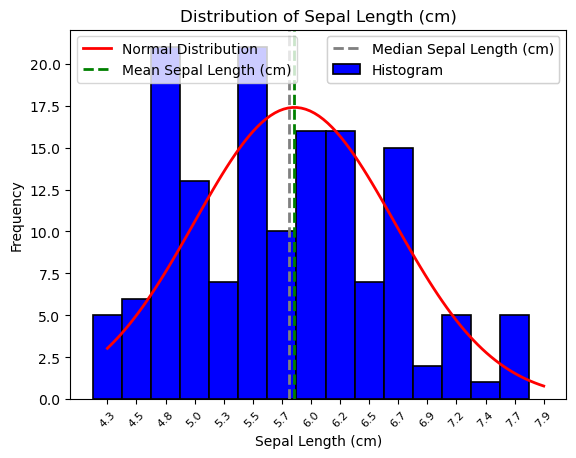

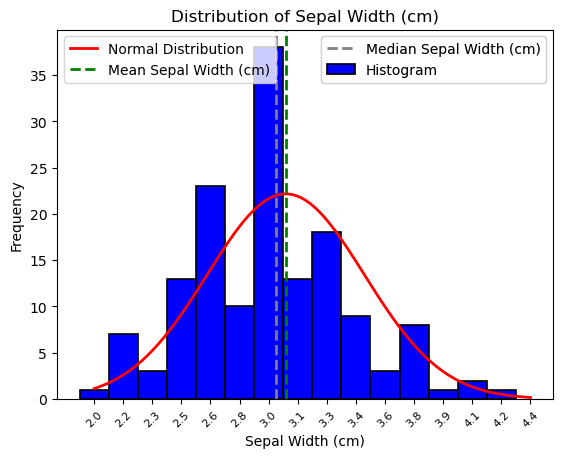

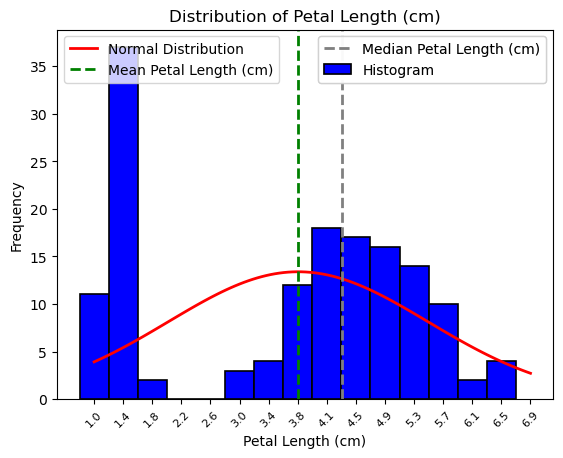

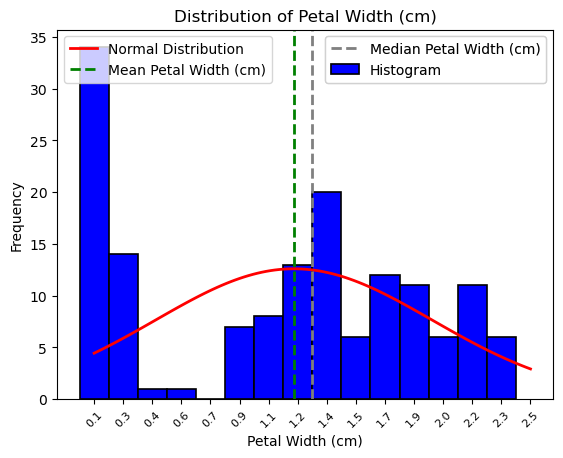

In [5]:
def create_histogram (file_name):
    """
    Create histograms for continuous variables in the dataset.

    Parameter:
        file_name: Name of the file containing the Iris DataSet.
    """
    # Load the dataset
    df = load_dataset(file_name)

    # Create directory if it doesn't exist
    os.makedirs("histogram", exist_ok=True)

    # Iterate through each continuous variable in the dataset
    for column_name, data in df.select_dtypes(include=['float64']).items():
        # Calculate histogram with specified number of bins
        num_bins = 15
        # Store the counts of data points in each bin and bin edges
        counts, bin_edges = np.histogram(data, bins=num_bins)

        # Plot histogram using plt.bar() with bin edges and counts
        plt.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), color='blue', edgecolor='black', linewidth=1.2, label=f'Histogram')

        # Add title and labels
        plt.title(f"Distribution of {column_name}")
        plt.xlabel(column_name)
        plt.ylabel("Frequency")

        # Calculate positions for tick labels at bin edges
        tick_positions = bin_edges  

        # Set custom x-axis tick positions and labels
        plt.xticks(tick_positions, labels=[f"{bin_edge:.1f}" for bin_edge in bin_edges], rotation=45, fontsize=8)

        # Calculate skewness of the data
        skewness = skew(data)
        
        # Check if data is approximately normal or skewed
        if abs(skewness) < 0.5:   
            # Fit a normal distribution to the data, estimating mean (mu) and standard deviation (std) of the data
            mu, std = norm.fit(data)

            # Generate x values for the normal distribution curve
            x = np.linspace(min(data), max(data), 100)
            # Calculate the probability density function (PDF) for the normal distribution
            pdf = norm.pdf(x, mu, std)  

            # Plot the normal distribution curve (bell-shaped line)
            plt.plot(x, pdf * len(data) * np.diff(bin_edges)[0], 'r-', linewidth=2, label='Normal Distribution')

        # if data is not approximately normal 
        else:   
            # Add a line representing skewness           
            plt.axvline(np.mean(data) + np.std(data), color='green', linestyle='dashed', linewidth=2, label='Skewness Line')

        # Calculate the mean of the data
        mean = np.mean(data)
        # Calculate the median of the data
        median = np.median(data)

        # Add vertical lines at the mean and median values
        plt.axvline(mean, color='green', linestyle='dashed', linewidth=2, label=f'Mean {column_name}')
        plt.axvline(median, color='gray', linestyle='dashed', linewidth=2, label=f'Median {column_name}')

        # Create legend handles and labels for different groups of legends
        handles, labels = plt.gca().get_legend_handles_labels()

        # Create legend for left side (Histogram and Normal Distribution)
        left_legend = plt.legend(handles[:2], labels[:2], loc='upper left')

        # Create legend for right side (Mean Depth and Median Depth)
        right_legend = plt.legend(handles[2:], labels[2:], loc='upper right')

        # Add both legends to the plot
        plt.gca().add_artist(left_legend)
        plt.gca().add_artist(right_legend)

        # Save the histogram as a PNG file within the histogram directory
        plt.savefig(os.path.join("histogram",f"{column_name}_histogram.png"))
        
        # Close the current figure to release memory and avoid overlapping plots
        # plt.close() 
        # Added this to display the histograms in this Jupyter Notebook
        plt.show()

# If this script is executed as the main program
if __name__ == "__main__":
    # Execute create_histogram using the 'iris.data' dataset as an argument 
    create_histogram('iris.data')

## 4 Scatterplot

The "scatterplot.py" program generates scatterplots, which are all plotted in the same figure and aids in properly viewing the relationship between each two continuous variables of the Iris DataSet and how the distribution of these relationships are when grouped by species.

### 4.1 Script

<u>**Segments and functions:**</u>  

The function "create_scatterplot(file_name)" is defined in scatterplot.py to plot pairs of continuous variables from Iris DataSet, illustrating their relationship. This are the other functions used within "create_scatterplot":

- Utilize the "load_dataset" function from the "load_iris" module to load the Iris dataset.

- Segment "Extract continuous variable names": 
    - An empty list is initialized to store the names of continuous variables found in the Iris DataSet [[79]](#79).
    - "for column_name, data in df.items()" is a loop applied to iterate over each column in "df", where column_name represents the column and data represent teh data contained in each column [[48]](#48).
        - "if data.dtype == 'float64'": this condition checks if the data is continuous (float64) [[55]](#55).
            - when data type is "float64", then the name of the column is appended to the "continuous_vars" list via "continuous_vars.append(column_name)" [[79]](#79).

- The "seaborn.pairplot" function creates a grid of pairwise scatterplots for the Iris DataFrame [[80]](#80). Parameters:
    - "vars=continuous_vars": specifies the continous variables to include in the pairplot, extracted earlier.
    - "hue='Species'": colours the scatterplot points based on the categorical variable "Species", which helps differentiate data points belonging to different species.

- Finally, "plot.show" is used to display the scatterplot matrix created by "snr.pairplot" [[78]](#78).

<u>**Main Execution:**</u>  
- The script checks if it's being run as the main program (if __name__ == "__main__":) and generates a figure with a grid of pairwise scatterplots of the continuous variables from the file "iris.data" [[34]](#34).


### 4.2 Plotted scatterplot

The pair plot of the Iris dataset shows clear differences among the three Iris species based on their sepal and petal sizes. Iris-setosa stands out with its smaller petal length and width, creating distinct clusters in the plots involving these variables. On the other hand, Iris-versicolor and Iris-virginica overlap more in their sepal measurements but can still be discriminated by their petal sizes, with Iris-virginica generally having larger petals.

In summary, petal measurements are better at distinguishing the species than sepal measurements. The individual density plots along the diagonal highlight that Iris-setosa has less variation in all its features, while Iris-versicolor and Iris-virginica show more spread, with Iris-virginica usually having larger petal sizes.

Next a heatmap can provide a visual representation of the correlation between the different features of the Iris dataset.

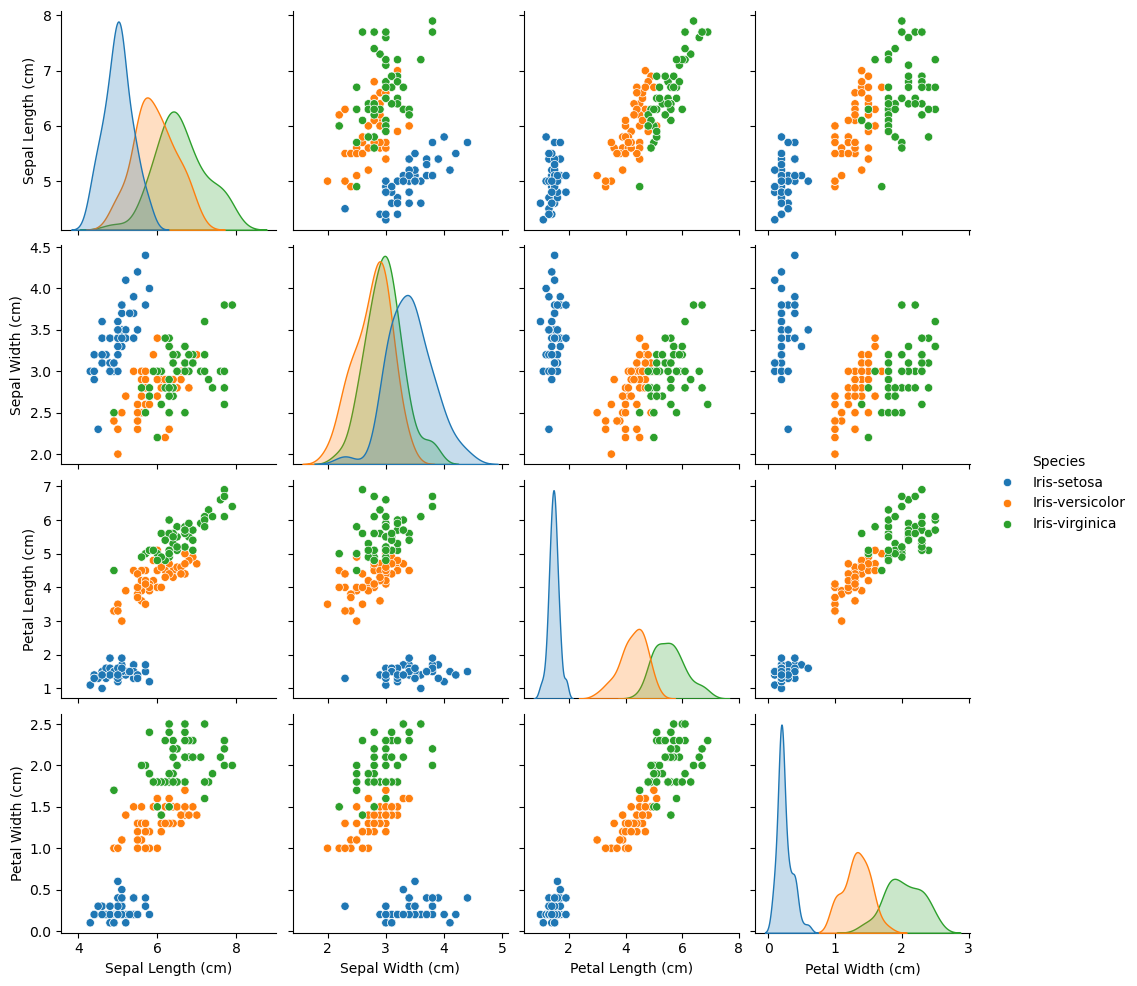

In [6]:
def create_scatterplot (file_name):
    """
    Creates a scatterplot matrix for the given dataset file.

    Parameter:
        file_name (str): Name of the file containing the Iris DataSet.
    """
    # Load the dataset
    df = load_dataset(file_name)

    # Extract continuous variable names
    continuous_vars = []
    # Iterate through each column in the DataFrame
    for column_name, data in df.items():
        # Check if data type is float64
        if data.dtype == 'float64':  # Check if data type is float64
            # If the data type is float64, add the column name to the list of continuous variables
            continuous_vars.append(column_name)
    
    # Create scatterplot matrix with seaborn pairplot
    sns.pairplot(df, vars=continuous_vars, hue='Species')
    # Display the scatterplot matrix
    plt.show()

# If this script is executed as the main program
if __name__ == "__main__":
    # Execute the function create_scatterplot using the 'iris.data' dataset as an argument
    create_scatterplot('iris.data')

## 5 Heatmap

The "heatmap.py" program prints out a heat map displaying the correlation between the pair of continuous variables of the Iris DataSet. The map is represented with colours and decimal numbers. 


### 5.1 Script

This is the way the colours are interpreted [[81]](#81):
- The darker the red more is the positive correlation.
- The darker the blue more is the negative correlation.
- The lighter the blue or red less correlation exists.

In regards to the numbers you can use the following to make sense of the correlation [[82]](#82):
- Strong Relationships: x ≥ 0.5 or x ≤ -0.5
- Moderate Relationships: 0.3 ≤ x < 0.5 or -0.5 < x ≤ -0.3
- Weak Relationships: -0.3 < x < 0.3
        
<u>**Segments and functions:**</u>  

The function "create_heatmap(file_name)" is defined to plot correlation between pairwise of continuous variables of the Iris DataSet. This wraps the following functions:

- Use the "load_dataset" function from the "load_iris" module to load the Iris dataset.

- "df.select_dtypes(include=['float64', 'int64'])" ensures that only numerical data is used to compute the correlation matrix. This is aliased to "numeric_df" [[55]](#55).

- The function "corr" is applied to "numeric_df" to calculate pairwise correlation coefficients between the numeric columns [[83]](#83). This is assigned to the alias corr.

- Segment "Create a heatmap plot":
    - It sets the figure size to (10, 8) using "plt.figure(figsize=(10, 8))" [[84]](#84).
    - The correlation matrix is visualized as a heatmap using sns.heatmap and the following parameters [[85]](#85):
        - "annot=True" adds annotations with correlation values.
        - "cmap='coolwarm'" sets the color map to coolwarm.
        - " fmt=".2f" " formats the annotations to two decimal places.
        - "linewidths=0.5" specifies the width of the lines separating cells.
    
- "plt.title" sets the title of the heatmap to "Correlation Heatmap" [[59]](#59).

- A dictionary called "legend_labels" is defined for different strength levels of relationships. These levels are defined within this dictionary.

- Segment "Add legend annotations to the bottom of the chart, side by side":
    - Initialize an empty list to hold legend handles with "handles = []" [[79]](#79).
    - "for label, threshold in legend_labels.items()": this loop iterates through the legend_labels dictionary that was previously defined [[48]](#48). "label" is the descriptive text for the legend, and "threshold" is the numeric value representing the strength of the relationship:
        - "ax.scatter([], [], color='black', label=label)" creates a dummy scatter plot [[86]](#86). Parameters:
            - "[]" for both x and y axes means no actual data points are plotted.
            - "color" sets the color of the plot markers to black.
            - label=label assigns the current label text to the scatter plot.
        - The resulting scatter plot object is appended to the "handles" list using "handles.append" [[79]](#79).
    - Add legend with specified properties [[87]](#87):
        - "plt.legend" creates a lengend 
        - "handles=handles" uses the handles stored in the handles list.
        - "loc='upper center'" positions the legend in the upper center of the plot.
        - "bbox_to_anchor=(0.5, -0.1)" fine-tunes the position of the legend box. 0.5 centers it horizontally, and -0.1 places it slightly below the plot.
        - "ncol=3" arranges the legend items into 3 columns.
        - "fontsize=10" sets the font size of the legend text.            

- Finally, "plot.show" is used to display the heatmap [[78]](#78).

<u>**Main Execution:**</u>  
- The script checks if it's being run as the main program (if __name__ == "__main__":) and generates the pairwise heatmap of the numerical variables from "iris.data" [[34]](#34).

### 5.2 Plotted heatmap

The correlation heatmap of flower measurements reveals significant relationships between different variables. Petal length and petal width exhibit a very strong positive correlation (0.96), indicating that as petal length increases, petal width also tends to increase substantially. Similarly, sepal length has strong positive correlations with both petal length (0.87) and petal width (0.82), suggesting that flowers with longer sepals tend to have longer and wider petals.

On the other hand, sepal width shows moderate negative correlations with petal length (-0.42) and petal width (-0.36), implying that as sepal width increases, both petal length and width tend to decrease moderately. The relationship between sepal length and sepal width is weakly negative (-0.11), indicating only a slight inverse relationship. These insights highlight key dependencies between flower dimensions, useful for biological analysis and predictive modeling.

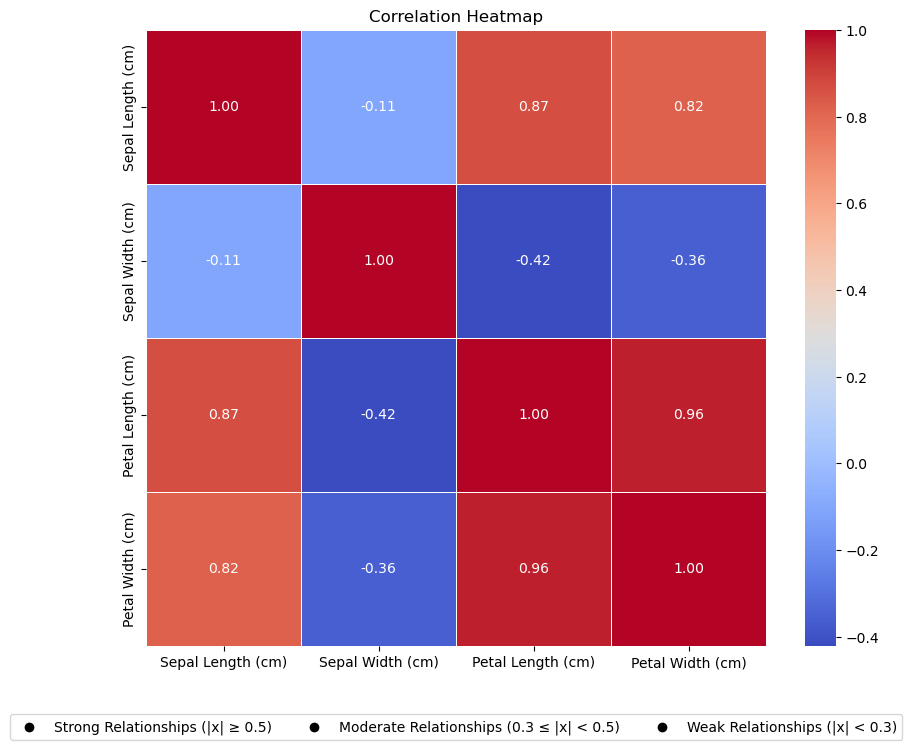

In [7]:
def create_heatmap(file_name):
    """
    Creates a correlation heatmap for the given dataset file.

    Parameter:
        file_name: Name of the file containing the Iris DataSet.
    """
    # Load the dataset
    df = load_dataset(file_name)

    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Calculate correlation matrix
    corr = numeric_df.corr()
    

    # Create a heatmap plot

    # Set the figure size
    plt.figure(figsize=(10, 8))
    # Create the heatmap with Seaborn
    ax = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

    # Set the title of the heatmap plot
    plt.title('Correlation Heatmap')
    
    # Define legend labels for different strength levels of relationships
    legend_labels = {
    'Strong Relationships (|x| ≥ 0.5)': 0.5,
    'Moderate Relationships (0.3 ≤ |x| < 0.5)': 0.4,
    'Weak Relationships (|x| < 0.3)': 0.2
    }


    # Add legend annotations to the bottom of the chart, side by side

    # Initialize an empty list to hold legend handles
    handles = []
    # Iterate over legend labels and thresholds
    for label, threshold in legend_labels.items():
        # Create dummy scatterplots for each label
        handles.append(ax.scatter([], [], color='black', label=label))
        
    # Add legend with specified properties
    plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=10)
    
    # Display the heatmap
    plt.show()

# If this script is executed as the main program
if __name__ == "__main__":
    # Execute create_heatmap using the 'Iris.data' as an argument 
    create_heatmap('iris.data')

## 6 Correlation Summary

The program correlation.py is designed to perform a detailed correlation analysis on the Iris dataset, categorizing correlations between numeric variables into strong, moderate, and weak relationships, and returns a formatted summary of these relationships. This summary helps in understanding the strength and direction of relationships between pairs of variables in the dataset.

### 6.1 Script

<u>**Segments and functions:**</u>  

The function "create_correlation" takes a file name as an argument and generates a summary of correlation analysis. These are the other functions and segments retained within "create_correlation":

- The dataset is loaded into a DataFrame "df" using the load_dataset function from imported custom module load_iris.

- Only numeric columns are selected for correlation analysis using select_dtypes [[55]](#55).

- The correlation matrix corr is computed using the corr method, which calculates the Pearson correlation coefficients between the numeric columns [[83]](#83).

- Segment "Group Correlations by Strength" initializes three lists to hold correlations classified by their strength: strong, moderate, and weak correlations [[79]](#79).

- Segment "Iterate Over Column Pairs":
    - Nested loops (for) iterate over each pair of columns (col1 and col2) in the correlations matrix "corr". "corr.columns" provides the column names of the correlation matrix [[88]](#88).
    - Redundant calculations are avoided by only considering unique pairs (col1 < col2), using "if" condition.
    - "corr.loc[col1, col2]" retrieves the correlation coefficient between the columns col1 and col2 from the correlation matrix "corr" [[89]](#89).
    - Correlations are categorized and stored (function: append) in the appropriate lists (initialized in segment "Group Correlations by Strength) based on their absolute values (abs), using "if", "elif" and "else" condition [[79]](#79) [[62]](#62).

- Segment "Sort correlations within each category" uses the predefined correlation groups in segment "Group Correlations by Strength" with the function "sort" to organize the correlation results [[90]](#90). It uses the following parameters:
    - "lambda x: x[2]" function extracts the third element (correlation coefficient) from each tuple in the list. Assign this function to alias key [[91]](#91).
    - sort the list in descending order with reverse=True [[90]](#90).

- "correlation_output = "" " initializes an empty string to build the correlation analysis summary [[92]](#92).

- Headers are added to the string everytime the variable "correlation_output" is presented with the operators "+=" followed by a string, by appending these headers to correlation_output [[92]](#92).

- For each section added based on the 3 relationship levels a loop iterates over each of the correlation tuple for that given level [[93]](#93) [[94]](#94). In this loop:
    - "correlation[0]" is the first column name.
    - "correlation[1]" is the second column name.
    - "correlation[2]:.2f" is the correlation coefficient, formatted to two decimal places.
    - Each formatted string is appended to "correlation_output".

- "return correlation_output" is used to return a detailed, formatted summary of the correlation analysis [[95]](#95).

<u>**Main Execution:**</u>  
- The script checks if it's being run as the main program (if __name__ == "__main__":) and generates the correlation summary from the analysis completed for each pair of numerical variables from 'iris.data' [[34]](#34).

Note: "print(create_correlation('iris.data'))" statement is not part of correlation.py and was added to the script below to display the correlation analysis summary in this Jupyter notebook.

### 6.2 Outcomes from correlation analysis

The Iris dataset shows strong positive correlations between petal dimensions and sepal length, moderate negative correlations between sepal width and petal dimensions, and a weak negative correlation between sepal length and sepal width.

In [8]:
def create_correlation(file_name):
    """
    Creates a correlation analysis summary for the given dataset file.

    Parameter:
        file_name: Name of the file containing the Iris DataSet.
    """
    # Load the dataset
    df = load_dataset(file_name)

    # Select only numeric columns for correlation analysis
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Calculate correlation matrix
    corr = numeric_df.corr()


    # Group correlations by strength of relationship
    
    # Holds correlations with |correlation coefficient| ≥ 0.5
    strong_correlations = []
    # Holds correlations with 0.3 ≤ |correlation coefficient| < 0.5
    moderate_correlations = []
    # Holds correlations with |correlation coefficient| < 0.3
    weak_correlations = []


    # Iterate Over Column Pairs

    # Iterate over each pair of columns to calculate correlations
    for col1 in corr.columns:
        # Iterate over the remaining columns to avoid redundant calculations
        for col2 in corr.columns:
            # Filter out mirrored correlations and only consider unique pairs
            if col1 < col2: 
                # Calculate the correlation coefficient between the two columns 
                correlation = corr.loc[col1, col2]
                # Check if the correlation coefficient indicates a strong relationship
                if abs(correlation) >= 0.5:  
                    # Store the pair of columns and their correlation coefficient in the strong_correlations list
                    strong_correlations.append((col1, col2, correlation))
                # Check if the correlation coefficient indicates a moderate relationship
                elif abs(correlation) >= 0.3:  
                    # Store the pair of columns and their correlation coefficient in the moderate_correlations list
                    moderate_correlations.append((col1, col2, correlation))
                # If the correlation coefficient does not meet the thresholds for strong or moderate correlation 
                else:
                    # Store the pair of columns and their correlation coefficient in the weak_correlations list
                    weak_correlations.append((col1, col2, correlation))


    # Sort correlations within each category based on the absolute value of correlation coefficient
    
    # Sort strong correlations in descending order of correlation coefficient
    strong_correlations.sort(key=lambda x: x[2], reverse=True)
    # Sort moderate correlations in descending order of correlation coefficient
    moderate_correlations.sort(key=lambda x: x[2], reverse=True)
    # Sort weak correlations in descending order of correlation coefficient
    weak_correlations.sort(key=lambda x: x[2], reverse=True)


    # Build correlation analysis as a string
    correlation_output = ""
    # Add header describing the correlation analysis
    correlation_output += "For x = correlation coefficient between each two variables of the Iris dataset, the following assumptions can be made: \n\n"
    
    # Add section for strong relationships (|correlation coefficient| ≥ 0.5)
    correlation_output += "Strong Relationships 'abs(x)>= 0.5':\n"
    # Iterate over strong correlations and add them to the summary
    for correlation in strong_correlations:
        # Add formatted string to include column names and their corresponding correlation coefficient in the summary
        correlation_output += f"- {correlation[0]} and {correlation[1]} is {correlation[2]:.2f}\n"

    # Add section for moderate relationships (0.3 ≤ |correlation coefficient| < 0.5)
    correlation_output += "\nModerate Relationships 'abs(x)>= 0.3':\n"
    # Iterate over moderate correlations and add them to the summary
    for correlation in moderate_correlations:
        # Add formatted string to include column names and their corresponding correlation coefficient in the summary
        correlation_output += f"- {correlation[0]} and {correlation[1]} is {correlation[2]:.2f}\n"

    # Add section for weak relationships (|correlation coefficient| < 0.3)
    correlation_output += "\nWeak Relationships 'abs(x) < 0.3':\n"
    # Iterate over weak correlations and add them to the summary
    for correlation in weak_correlations:
        # Add formatted string to include column names and their corresponding correlation coefficient in the summary
        correlation_output += f"- {correlation[0]} and {correlation[1]} is {correlation[2]:.2f}\n"

    # Return a string containing the correlation analysis summary
    return correlation_output

# If this script is executed as the main program
if __name__ == "__main__":
    # Execute create_correlation using the 'iris.data' dataset as an argument 
    create_correlation('iris.data')
# Added to this Jupyter Notebook to display the correlation analysis as presented in section 5 of the summary.txt
print(create_correlation('iris.data'))

For x = correlation coefficient between each two variables of the Iris dataset, the following assumptions can be made: 

Strong Relationships 'abs(x)>= 0.5':
- Petal Length (cm) and Petal Width (cm) is 0.96
- Petal Length (cm) and Sepal Length (cm) is 0.87
- Petal Width (cm) and Sepal Length (cm) is 0.82

Moderate Relationships 'abs(x)>= 0.3':
- Petal Width (cm) and Sepal Width (cm) is -0.36
- Petal Length (cm) and Sepal Width (cm) is -0.42

Weak Relationships 'abs(x) < 0.3':
- Sepal Length (cm) and Sepal Width (cm) is -0.11



## 7 Analysis

The program analysis.py has been created to import all the programs developed for this project and rum them all from a centralized program [[96]](#96).       
From the snippet below each custom program has its defined function imported within analysis.py. Then, the iris.data is assigned to an alias "file_name" that is called out within each of the functions imported.  
The program analysis.py can be executed to display the scatterplot and heatmap, save the text file with the summary of the Iris dataset and correlation summary, and save histograms images within the folder histogram.

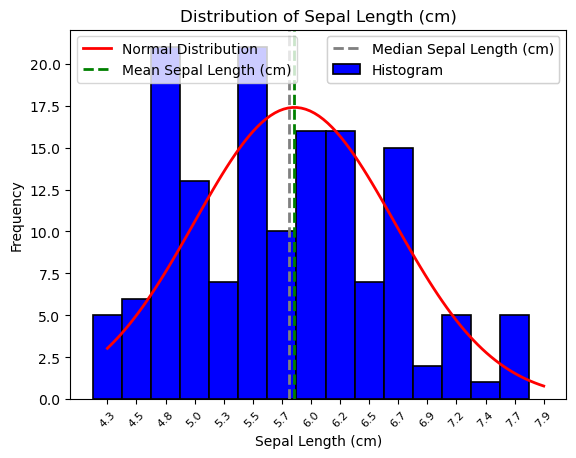

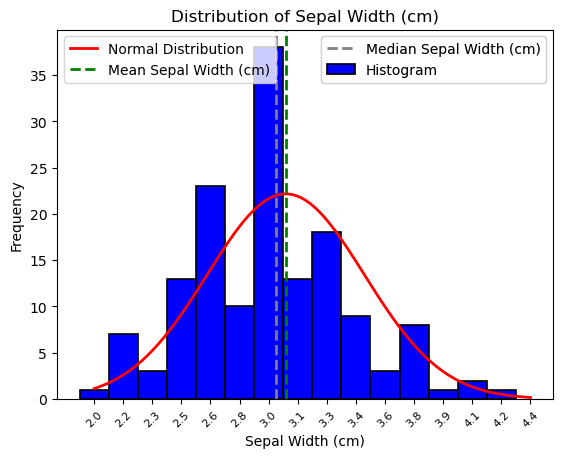

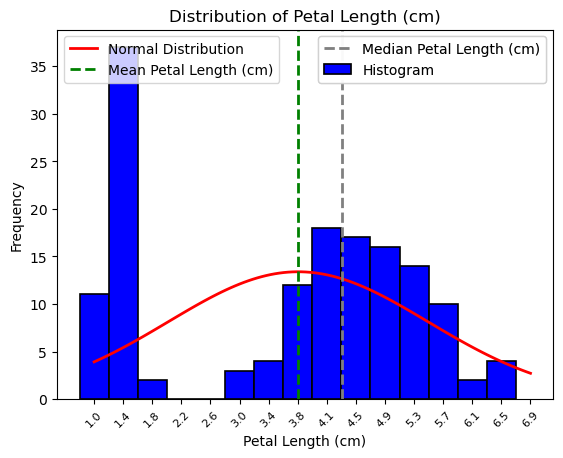

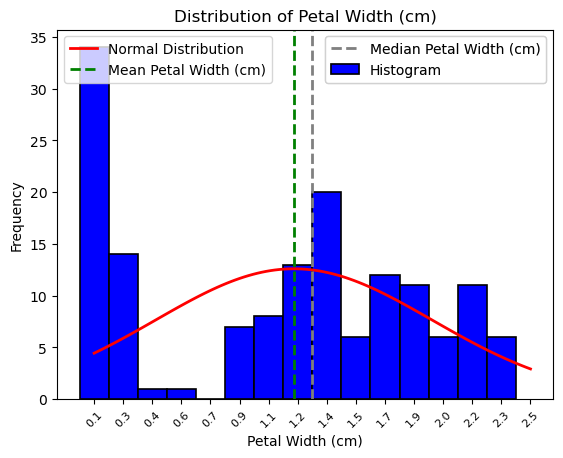

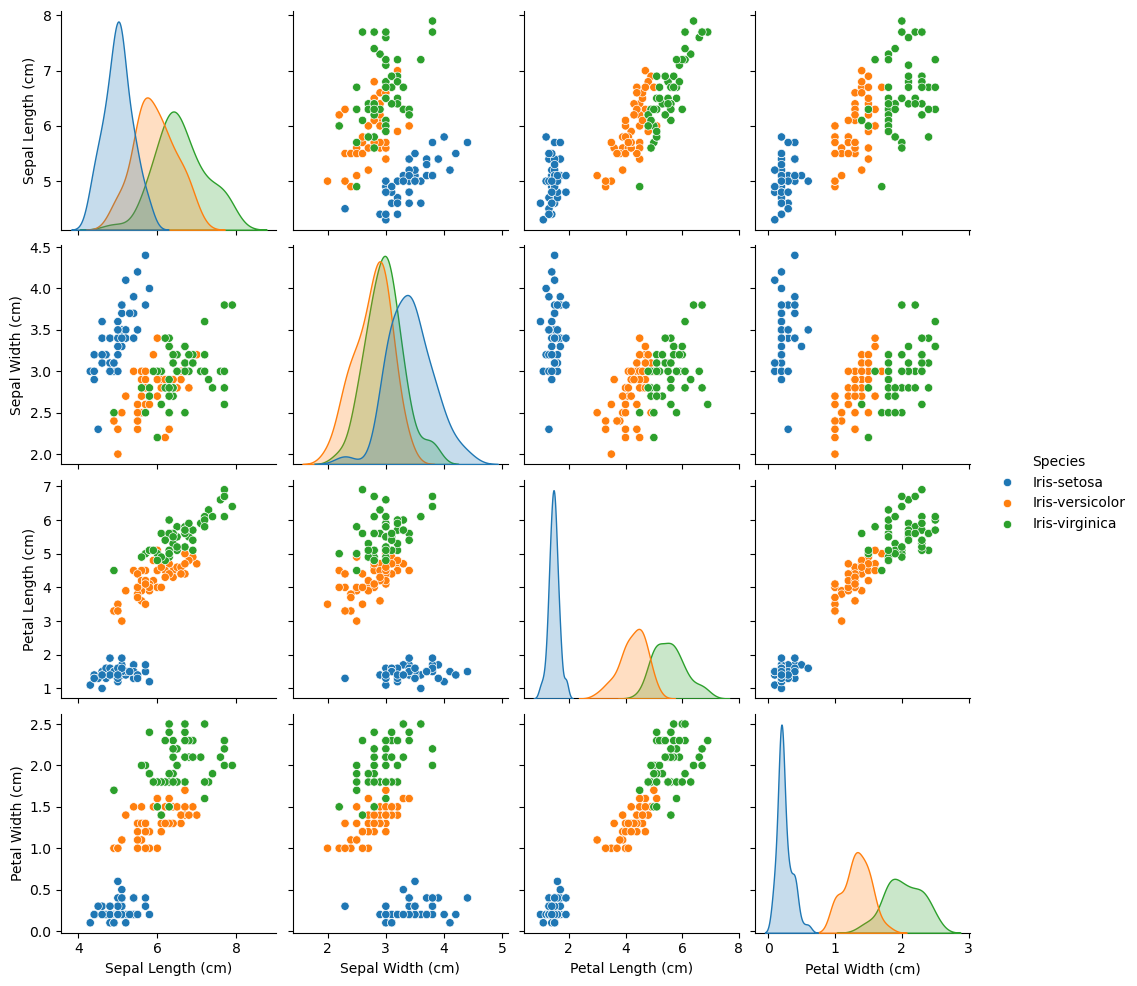

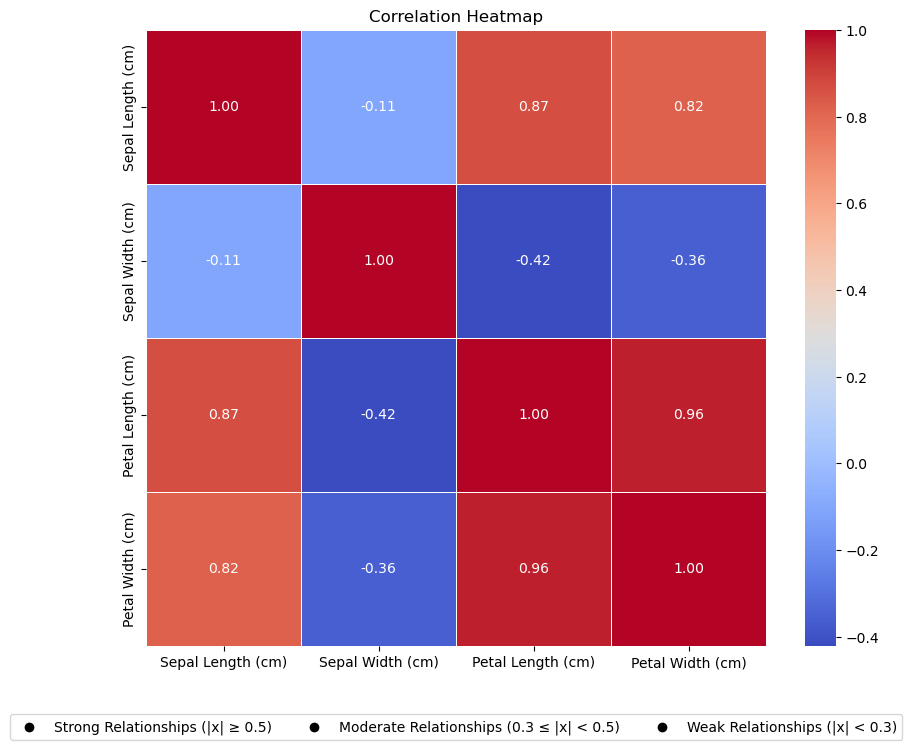

In [9]:


# Assign the Iris DataSet 'iris.data' to a variable file_name
file_name = 'iris.data'


# Pass the variable representing 'iris.data' as an argument within the functions below and execute them.

# 1: Outputs a summary of each variable to a single text file
create_summary(file_name)
   
# 2: Saves a histogram of each variable to PNG files
create_histogram(file_name)

# 3: Outputs a scatter plot of each pair of variables
create_scatterplot(file_name)

# 4: Outputs a heatmap with the correlation between the pair of variables
create_heatmap(file_name)


## Conclusion


The analysis of the Iris dataset provided valuable insights into how flower measurements are connected, using simple statistical summaries, correlation analysis, and visualizations. Summary statistics helped show the average values and variations in the dataset. For example, the average sepal length was 5.84 cm, with most measurements falling within 0.83 cm of this average. These measures helped us see how each feature varied and where patterns emerged, like petals having more variation than sepals.

Visualizing the data through heatmaps helped us see strong positive connections between certain features, like petal length and width, which tended to increase together. This made it easier to spot which measurements were closely linked. The correlation summary further grouped these connections into strong, moderate, and weak categories, giving us a clearer picture of how different measurements depend on each other. These findings have implications for both statistics and biology, suggesting that certain measurements may be influenced by other biological factors. This understanding could guide future research, like creating programs to classify different Iris species based on their measurements. Overall, this analysis provided a straightforward look into the Iris dataset, highlighting the importance of digging deep into data to uncover meaningful relationship.

****

## End